In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [3]:
include("../model-35/likelihood.jl")
include("../model-35/utill_model.jl")
include("../utill.jl")

plot_projections (generic function with 1 method)

In [4]:
conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [5]:
param_truth = (
    tr_size = [0.14, 0.14], 
    ang_spr = [4.0, 4.0], 
    waist = [2.93], 
    algmx = [36.0, 37.0, 19.0, 33.0], 
    algmy = [33.0, 34.0, 21.0, 35.0], 
    cam4_ped = 26.0, 
    cam4_light_fluct = 1.30, 
    cam4_light_amp = 8.90, 
    resx = [1, 1, 1], resy = [1, 1, 1], 
    cam4_resx = 5.8, 
    cam4_resy = 2.8, 
    psx = [27.1, 21.6, 114.0], 
    psy = [30.5, 23.4, 125.0], 
    cam4_psx = 121.8, 
    cam4_psy = 120.0, 
    light_amp = [8.5, 11.1, 2.5], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
);

In [ ]:
# param_truth = (
#     tr_size = [0.11724079324690752, 0.10446872256040367], 
#     tr_size_2 = [0.13630640279044073, 0.14549663484213138], 
#     ang_spr = [5.397274414313642, 6.528127604183876], 
#     ang_spr_2 = [1.4157120257716762, 3.2679351152119036], 
#     mixt_pow = 0.7070115563071502, 
#     waist = [3.119983894686216], 
#     waist_2 = [2.899451404646074], 
#     algmx = [36.88502772777521, 37.40701041378727, 19.966993904337286, 33.77074180422043], 
#     algmy = [33.44305300220863, 34.181496465565395, 21.246755513569575, 35.47131065852915], 
#     cam4_ped = 26.752468993399273, 
#     cam4_light_fluct = 1.3437565724474658, 
#     cam4_light_amp = 8.944085887267018, 
#     resx = [1, 1, 1], resy = [1, 1, 1], 
#     cam4_resx = 5.8116797409487635, 
#     cam4_resy = 2.820829332831582, 
#     psx = [27.1, 21.6, 114.0], 
#     psy = [30.5, 23.4, 125.0], 
#     cam4_psx = 121.8, 
#     cam4_psy = 120.0, 
#     light_amp = [8.48381275056509, 11.159480294528969, 2.5932859795858954], 
#     s_cam = [0.0, 1.478, 15.026, 23.115]
# );

In [6]:
event = generate_event(param_truth, 26.8, conv_matrices)

(cam_1 = [0.0 0.0 … 10.0 946.0; 314.0 269.0 … 1.0 163.0; … ; 5.0 3.0 … 14.0 3.0; 27.0 34.0 … 61.0 173.0], cam_2 = [1.0 2.0 … 3.0 1.0; 1.0 2.0 … 1.0 1.0; … ; 1.0 262.0 … 7.0 2.0; 2.0 0.0 … 1.0 1.0], cam_3 = [28.0 2.0 … 14.0 203.0; 604.0 21.0 … 241.0 3.0; … ; 16.0 13.0 … 86.0 2.0; 0.0 10.0 … 3.0 130.0], cam_4 = [30.0 23.0 … 24.0 28.0; 32.0 27.0 … 29.0 40.0; … ; 24.0 9.0 … 22.0 29.0; 12.0 31.0 … 30.0 12.0], population = 26.8)

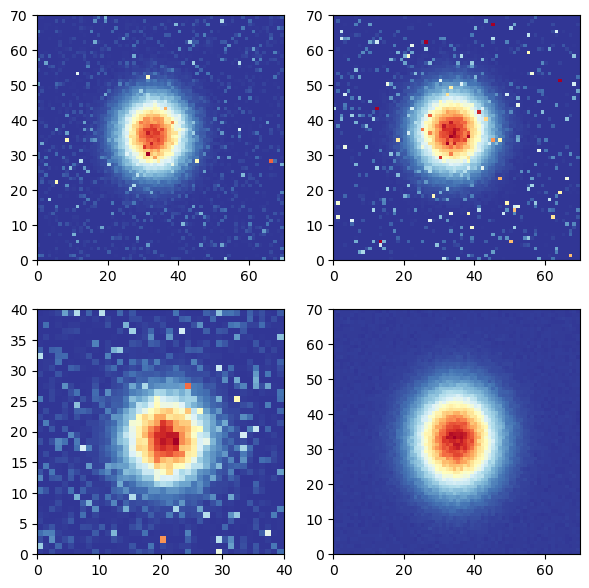

PyObject <matplotlib.collections.QuadMesh object at 0x7f634cd25cd0>

In [7]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

In [13]:
# @save "../../data/sampling_results/Benchmark-6/event-35.jld" event

In [9]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 2.0, 7.0), truncated(Normal(4.0, 2.0), 2.0, 7.0)],
        waist = [truncated(Normal(2.9, 0.03), 2.65, 3.5)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );

In [10]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

log_likelihood = log_lik_ndiff()

#49 (generic function with 1 method)

In [11]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCChainPoolInit(
    init_tries_per_chain = ClosedInterval(50,150),
    max_nsamples_init = 500,
    max_nsteps_init = 500,
    max_time_init = Inf
)

burnin = MCMCMultiCycleBurnin(
    max_nsamples_per_cycle = 10000,
    max_nsteps_per_cycle = 10000,
    max_time_per_cycle = Inf,
    max_ncycles = 130
)

nsamples = 4*10^5
nchains = 4

sampler = MetropolisHastings(tuning=tuning,)

algorithm = MCMCSampling(sampler=sampler, 
    nchains=nchains, 
    init=init, 
    burnin=burnin, 
    convergence=convergence
);

In [12]:
@time samples_tot = bat_sample(
    posterior, nchains*nsamples, algorithm,
    max_neval = nchains*nsamples,
    max_time = Inf,
);

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/chain_pool_init.jl:63
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/chain_pool_init.jl:185
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:38
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 4 fini

2014.766155 seconds (1.52 G allocations: 927.828 GiB, 3.55% gc time)


In [14]:
samples = samples_tot.result;

In [15]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

4128.5548738871275

In [16]:
size(flatview(unshaped.(samples.v)))

(21, 384214)

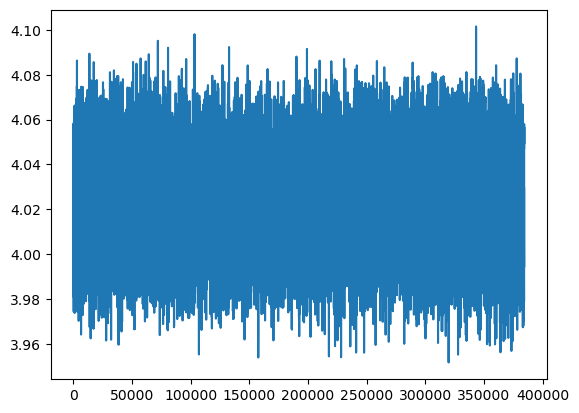

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f62f0f12e80>

In [17]:
plot(flatview(unshaped.(samples.v))[3,:])

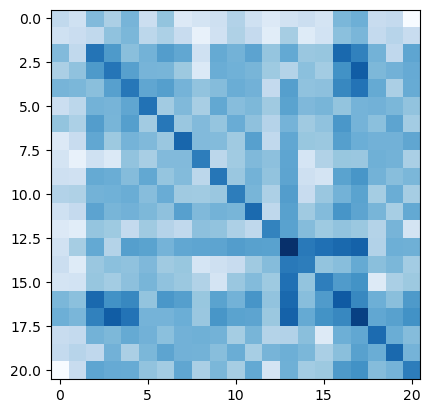

PyObject <matplotlib.image.AxesImage object at 0x7f62f0ef5190>

In [18]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [31]:
# using HDF5

In [32]:
# BAT.bat_write("../../data/sampling_results/Benchmark-6/samples-35.hdf5", unshaped.(samples))

In [ ]:
#  27.1, 21.6, 114.0, 30.5, 23.4, 125.0, 121.8, 120.0

In [22]:
mode(samples)[1]

(tr_size = [0.1420547989011691, 0.14165713743261685], ang_spr = [4.027077226558909, 4.0334386670563145], waist = [2.9060037662796123], algmx = [36.034020416367866, 36.96461964701567, 19.03828914676052, 32.98405710693551], algmy = [32.980558478830744, 33.97354716151432, 20.98499769435945, 34.997130293722115], cam4_ped = 25.920281058263587, cam4_light_fluct = 1.2894262403933587, cam4_light_amp = 8.87088982664201, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 5.698043725427922, cam4_resy = 2.6764855597178654, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.498741807580092, 11.18657275898066, 2.509996558710556], s_cam = [0.0, 1.478, 15.026, 23.115])

In [23]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.14193, 0.14143], ang_spr = [4.0195, 4.0355], waist = [2.9145000000000003], algmx = [36.0295, 36.9695, 19.021, 32.9725], algmy = [32.9925, 33.9725, 20.9845, 34.99825], cam4_ped = 25.835, cam4_light_fluct = 1.3014999999999999, cam4_light_amp = 8.88575, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 5.723000000000001, cam4_resy = 2.6725, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.497499999999999, 11.1785, 2.5175], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [24]:
mean(samples)[1]

(tr_size = [0.14172335486545412, 0.14146415862798914], ang_spr = [4.022036448467885, 4.035093226150271], waist = [2.9157198974535214], algmx = [36.030566447583546, 36.97534888165318, 19.020802731753605, 32.97420236735414], algmy = [32.99024873640214, 33.97262473617534, 20.982748103363623, 34.99958421654351], cam4_ped = 25.844848868181995, cam4_light_fluct = 1.3017479317539815, cam4_light_amp = 8.88690859059976, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 5.720586927533942, cam4_resy = 2.672495666201636, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.49807632867999, 11.17981453588818, 2.518699544089167], s_cam = [0.0, 1.478, 15.026, 23.115])

In [25]:
std(samples)[1]

(tr_size = [0.0004756289238339185, 0.00036515495864021926], ang_spr = [0.017223624319754514, 0.016639187997715785], waist = [0.015589487801420861], algmx = [0.018752117985031583, 0.015841312252001964, 0.026431105481309027, 0.01319467332141568], algmy = [0.016566843832581814, 0.013139294541770034, 0.02361120770869341, 0.011173759019358692], cam4_ped = 0.12871228706689491, cam4_light_fluct = 0.013194245238289761, cam4_light_amp = 0.01285413088984375, resx = 3-element Fill{Int64}: entries equal to 0, resy = 3-element Fill{Int64}: entries equal to 0, cam4_resx = 0.03738569528503501, cam4_resy = 0.07740187191089659, psx = 3-element Fill{Float64}: entries equal to 0.0, psy = 3-element Fill{Float64}: entries equal to 0.0, cam4_psx = 0.0, cam4_psy = 0.0, light_amp = [0.022408502449114354, 0.0240599740634189, 0.013473427196000727], s_cam = 4-element Fill{Float64}: entries equal to 0.0)

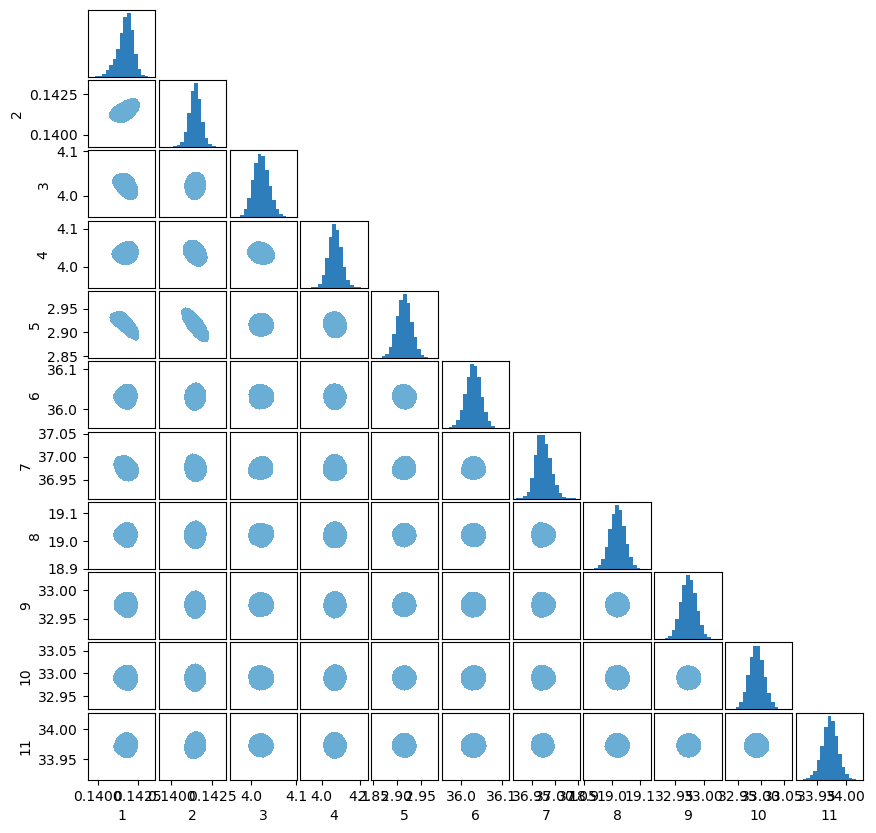

In [26]:
dims = [1,2,3,4,5,6,7,8,9,10,11]
# dims = [1,2,3,4,5,]
names = [1,2,3,4,5,6,7,8,9,10, 11]
# levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.90, 1,]
figsize = (10,10)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

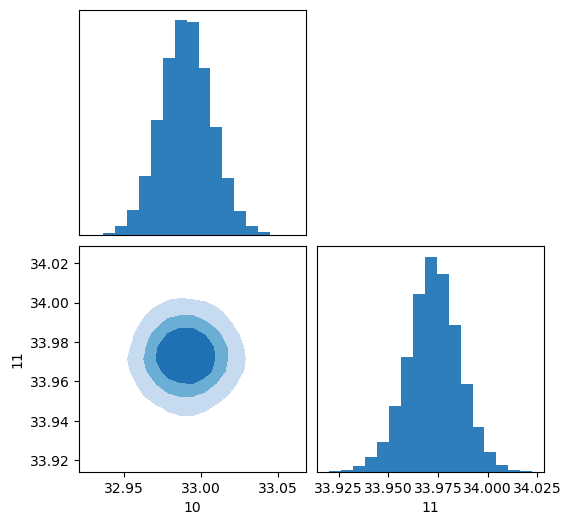

In [27]:
dims = [10,11,]
names = [10,11,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [28]:
flat_truth = vcat([i for i in param_truth]...)
flat_mode = vcat([i for i in mode(samples)[1]]...) ./flat_truth
flat_std = vcat([i for i in std(samples)[1]]...)./flat_truth;

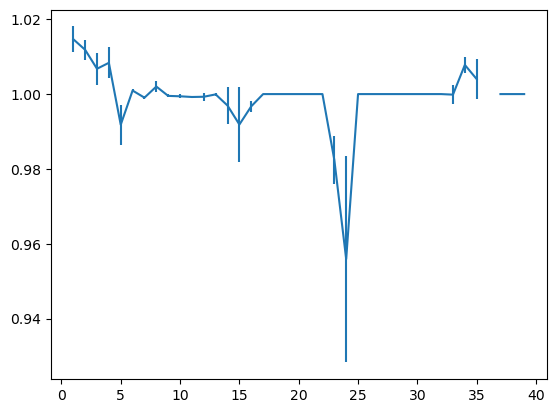

(PyObject <matplotlib.lines.Line2D object at 0x7f62e3931e20>, (), (PyObject <matplotlib.collections.LineCollection object at 0x7f62e393e310>,))

In [30]:
plt.errorbar(1:length(flat_mode), flat_mode, yerr=flat_std )